In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

from keras.layers import BatchNormalization, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score


In [ ]:

# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Cropped_Final/Train',
    target_size=(524, 524),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Cropped_Final/Test',
    target_size=(524, 524),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

Found 1080 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

model = Sequential()

# Layer 1
model.add(Conv2D(6, kernel_size=(5, 5), input_shape=(524, 524, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Layer 2
model.add(Conv2D(16, kernel_size=(5, 5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Flatten the tensor
model.add(Flatten())

# Layer 3
model.add(Dense(120, activation='relu', kernel_regularizer=l2(0.02)))  # Added L2 regularization
model.add(Dropout(0.2))

# Layer 4
model.add(Dense(84, activation='relu', kernel_regularizer=l2(0.02)))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation='sigmoid'))


optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Add ReduceLROnPlateau callback to reduce the learning rate if the validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=0.00001)


# Output the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 520, 520, 6)       156       
                                                                 
 batch_normalization (Batch  (None, 520, 520, 6)       24        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 520, 520, 6)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 260, 260, 6)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 260, 260, 6)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 16)      2

In [ ]:
# Compile and Train
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
history = model.fit(train_generator, epochs=20, validation_data=test_generator, callbacks=[early_stop])

Epoch 1/20
34/34 [==============================] - 144s 4s/step - loss: 7.8854 - accuracy: 0.5824 - val_loss: 6.3199 - val_accuracy: 0.5000
Epoch 2/20
34/34 [==============================] - 5s 139ms/step - loss: 5.8421 - accuracy: 0.6630 - val_loss: 5.5329 - val_accuracy: 0.5000
Epoch 3/20
34/34 [==============================] - 5s 135ms/step - loss: 5.0225 - accuracy: 0.7361 - val_loss: 4.9295 - val_accuracy: 0.5000
Epoch 4/20
34/34 [==============================] - 5s 140ms/step - loss: 4.4697 - accuracy: 0.7630 - val_loss: 4.4356 - val_accuracy: 0.5500
Epoch 5/20
34/34 [==============================] - 5s 140ms/step - loss: 3.9978 - accuracy: 0.8102 - val_loss: 4.0431 - val_accuracy: 0.6500
Epoch 6/20
34/34 [==============================] - 5s 138ms/step - loss: 3.5724 - accuracy: 0.8546 - val_loss: 3.6075 - val_accuracy: 0.8833
Epoch 7/20
34/34 [==============================] - 5s 133ms/step - loss: 3.2774 - accuracy: 0.8509 - val_loss: 3.3444 - val_accuracy: 0.8500
Epoch 8

In [ ]:
#  Evaluation

loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

2/2 [==============================] - 0s 115ms/step - loss: 1.8400 - accuracy: 0.8000
Test Loss: 1.8400
Test Accuracy: 80.00%


In [ ]:

# Get the true labels and predicted labels
y_true = test_generator.classes
predictions = model.predict(test_generator)
y_pred = np.round(predictions).astype(int).flatten()  # Convert probabilities to class labels

# Calculate F1-score, Recall, and Precision
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

2/2 [==============================] - 0s 96ms/step
Precision: 0.5397
Recall: 0.5333
F1-score: 0.5139


2/2 [==============================] - 0s 113ms/step


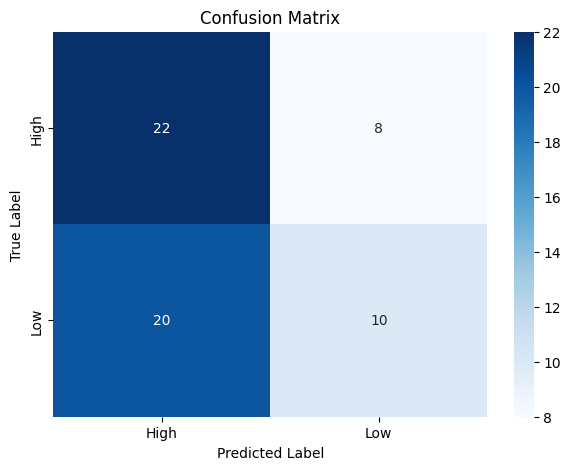

In [ ]:

# Get the true labels and predicted labels
y_true = test_generator.classes
predictions = model.predict(test_generator)
y_pred = np.round(predictions).astype(int).flatten()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Low'], yticklabels=['High', 'Low'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()






2/2 [==============================] - 0s 118ms/step


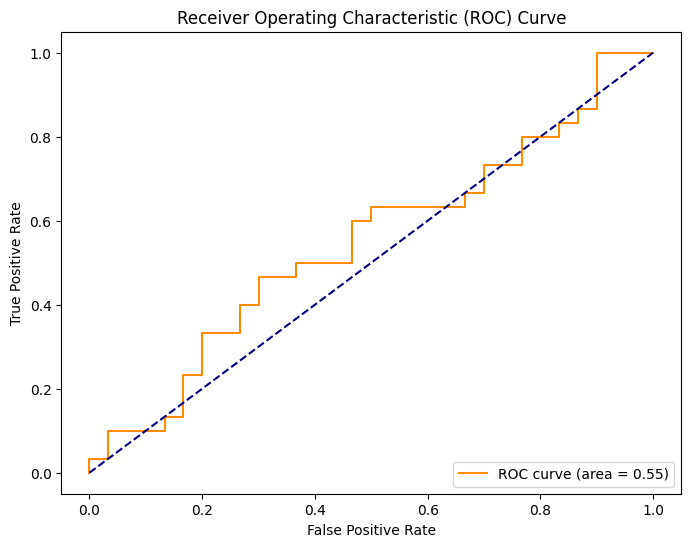

In [ ]:

# Get the true labels and predicted labels
y_true = test_generator.classes
predictions = model.predict(test_generator)
y_pred_prob = predictions[:, 0]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()